# Einführung Spektralschätzung

 Demonstriere Short-Term Fourier Transform mit verschiedenen Signalen
 
 STFT wird dargestellt mit Spectrogram und Wasserfall-Diagramm

 Testen Sie den Einfluss verschiedener Fensterlängen und Fenstertypen


In [5]:
import numpy as np
from numpy import (pi, log10, exp, sqrt, sin, cos, tan, angle, arange,
                    linspace, array, zeros, ones)
from numpy.fft import fft, ifft, fftshift, ifftshift, fftfreq
import scipy.signal as sig

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import (figure, plot, stem, grid, xlabel, ylabel,
    subplot, title, clf, xlim, ylim)
figsize = {"figsize": (12,5)}

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection

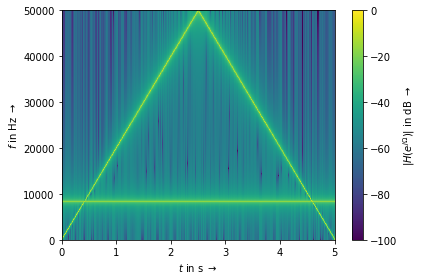

In [45]:
fs = 100e3 # Abtastfrequenz
NFFT = 1000 # FFT Punkte

fsig = 10000 # Signalfrequenz
Asig = 1 # Signalamplitude
fsig2 = 8376
Asig2 = 1
fmod = 0.5  # Modulationsfrequenz
Amod = 5000 # Modulation gain in Hz / V
tmax = 5 # Simulationzeit in s

dbmin = -100; dbmax = 0 # Limits fÃŒr log. Darstellung

win = sig.windows.kaiser(NFFT,12, sym = False) # needs NFFT and shape parameter beta 
#win = sig.windows.hann(NFFT, sym = False)
#win = sig.windows.blackman(NFFT, sym = False)
win = sig.windows.boxcar(NFFT) # rectangular window

# Calculate Equivalent Noise Bandwidth + Coherent Gain
ENBW = len(win)*np.sum(win**2)/ np.sum(abs(win))**2
CGain = np.sum(win)/len(win)

n = arange(NFFT/2 + 1)
t_label = r'$t$ in s $\rightarrow$'
f_label = r'$f$ in Hz $\rightarrow$'
H_label = r'$|H(e^{j \Omega})|$ in dB $\rightarrow$'


t = arange(0, tmax, 1/fs)
x = Asig*sig.chirp(t, 100, tmax, 1e5) # Chirp-Impuls
#x = Asig*(sin(t* 2* pi * fsig) + 1) # Reiner Sinus
#x = Asig*sin(t* 2* pi * fsig + Amod *sin(t* 2* pi * fmod)) # FM-Signal
#x = Asig *sin(t* 2* pi * (fsig + Amod * np.sign(sin(t * 2 * pi * fmod)))) # FSK-Signal
x += Asig2 * sin(t* 2* pi * fsig2) # ZusÃ€tzlicher Sinuston
#x = A*np.sign(x) # Rechteckfunktion

#figure(1)
#plot(t,x)
######################################################################
# Spectrogram
######################################################################
figure(2)
# scale factor for correct *signal power* of spectrogram:
scale = NFFT * CGain

Pxx, freqs, bins, im = plt.specgram(x, NFFT=NFFT, Fs=fs, 
                            noverlap=NFFT/2, mode = 'magnitude', window = win, 
                            scale = 'dB', vmin = dbmin, vmax = dbmax)
# freqs: DFT frequencies, bins: time steps                         

xlabel(t_label)
ylabel(f_label)
xlim([0,tmax])
ylim([0,fs/2])
plt.colorbar(label = H_label)
plt.tight_layout()

In der folgenden Zelle wird das Spektrum zu einem bestimmten Zeitpunkt bestimmt.

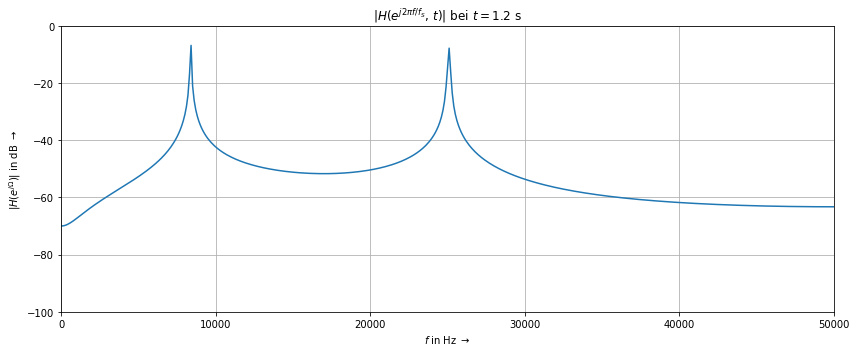

In [46]:
fig3, ax3 = plt.subplots(**figsize); grid(True)
time_slot = int(len(bins)/4)
ax3.plot(freqs, 20*log10(Pxx[:,time_slot]))
ax3.set_xlabel(f_label); ax3.set_ylabel(H_label)
ax3.set_title(r'$|H(e^{j 2 \pi f / f_S},\, t)|$ bei $t=%0.1f$ s' %(bins[time_slot]))
ax3.set_ylim([dbmin, dbmax]); ax3.set_xlim([0,fs/2])

plt.tight_layout()

Plotte ein Wasserfall-Diagramm

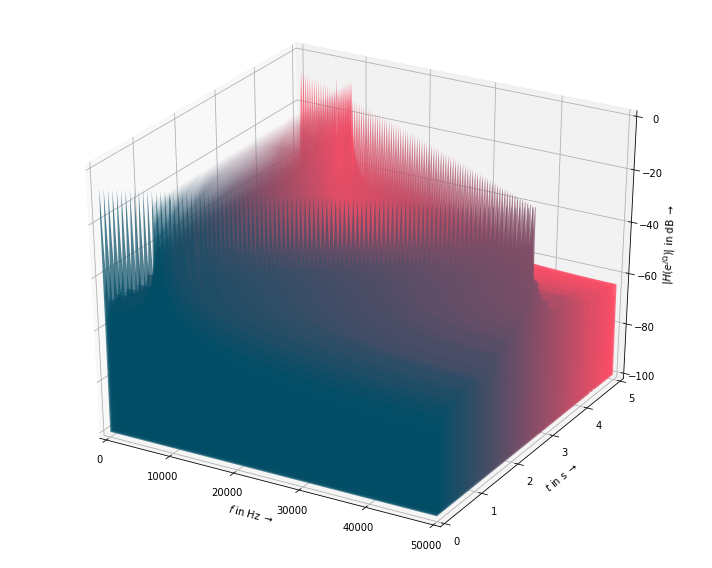

In [57]:
fig4, ax4 = plt.subplots(figsize=(10,8), subplot_kw = {'projection':'3d'})

xs = freqs # frequency axis
zs = arange(0,len(bins),5)  # time axis index
verts = []
mycolors = []

for z in zs:
    ys = np.maximum(20*log10(Pxx[:,z]),dbmin)
#    ys = np.random.rand(len(xs))
    ys[0], ys[-1] = dbmin, dbmin # set lower polygon points
    verts.append(list(zip(xs, ys)))
    mycolors.append((z/len(bins),0.3,0.4)) # r,g,b

poly = PolyCollection(verts, facecolors = mycolors)
                                      
poly.set_alpha(0.7) # set transparency
ax4.add_collection3d(poly, zs = zs/len(bins)*tmax, zdir='y')

ax4.set_xlabel(f_label); ax4.set_ylabel(t_label); ax4.set_zlabel(H_label)
ax4.set_xlim3d(0, max(xs)) # frequency
ax4.set_ylim3d(0, tmax) # time
ax4.set_zlim3d(dbmin, dbmax)
ax4.azim = -60# azimuth, default -60 deg.
ax4.elev = 30 # Höhe, default 30
ax4.dist = 10 # Entfernung, default 10
plt.tight_layout()